# Predicting Google Stock Price

## Part 1 - Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Importing the training set
dataset_train = pd.read_csv('/Users/praga/Downloads/Deep_Learning_A_Z/Recurrent_Neural_Networks/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2]
dataset_test = pd.read_csv('/Users/praga/Downloads/Deep_Learning_A_Z/Recurrent_Neural_Networks/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2]

In [11]:
print(dataset_train.head())
print(dataset_train.shape)

       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800
(1258, 6)


In [8]:
training_set.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [9]:
training_set.shape

(1258, 1)

In [12]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [13]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [16]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #(batch_size, time_steps, indicator)

## Part 2 - Building the RNN

In [21]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras import metrics

In [36]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 128, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 32, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fifth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 32))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0455
Epoch 2/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0074A: 0s - loss: 0.
Epoch 3/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0072
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0062
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0060
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0058
Epoch 7/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0060
Epoch 8/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0056
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0058
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0057A: 0s - loss: 0.0
Epoch 11/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0050
Epoch 12/100
1198/1198 [==============

1198/1198 [==============================] - 6s 5ms/step - loss: 0.0017
Epoch 97/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0018
Epoch 98/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0016


## Part 3 - Making the predictions and visualising the results

In [37]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [38]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

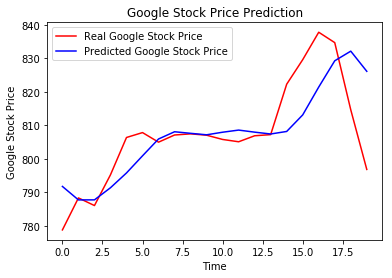

In [39]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
